In [108]:
# подключение необходимых базовых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# 1

In [109]:
# №1
# Загрузка HR.csv в датафрейм. Просматриваем структуру и пример загруженных данных
url = "https://drive.google.com/file/d/1INgo03nal-vwFJe7Lec5vOUtOwfJdUr1/view"
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url,error_bad_lines=False)
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB
None


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


# 2

In [51]:
# №2
# расчет всех статитстических показателей за исключением моды с помощью стандартного метода
print(df.describe(),'\n')


# отдельно расчет моды 
print(f'Мода satisfaction level: {df["satisfaction_level"].mode()[0]}')
print(f'Мода last_evaluation: {df["last_evaluation"].mode()[0]}')
print(f'Мода number_project: {df["number_project"].mode()[0]}')
print(f'Мода average_montly_hours: {df["average_montly_hours"].mode()[0]}')
print(f'Мода time_spend_company: {df["time_spend_company"].mode()[0]}')
print(f'Work_accident: {df["Work_accident"].mode()[0]}')
print(f'Мода left: {df["left"].mode()[0]}')
print(f'Мода promotion_last_5years: {df["promotion_last_5years"].mode()[0]}')


       satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14999.000000        14999.000000   14999.000000  14999.000000   
mean             201.050337            3.498233       0.144610      0.238083   
std               49.943099            1.460136       0.351719      0.425924   
min               96.000000            2.000000       0.000000      0.000000   
25%              156.000000            3.

# 3

<AxesSubplot:>

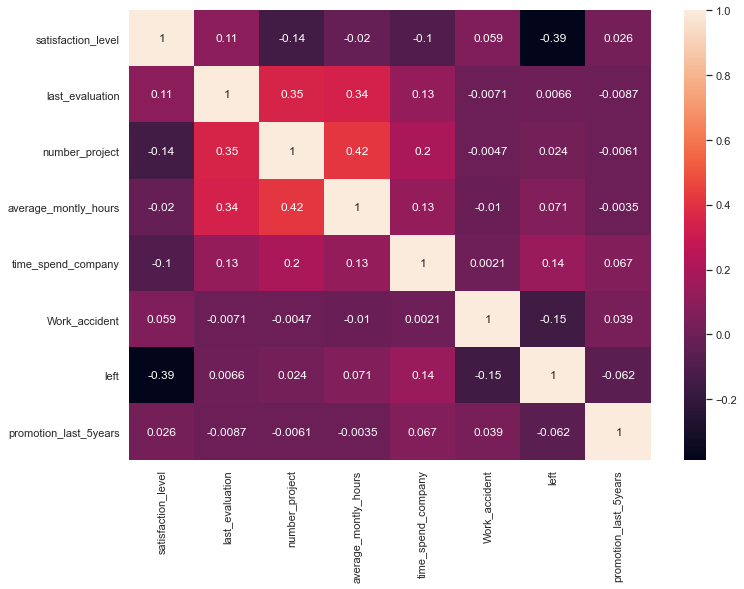

In [53]:
# №3
# рассчитываем корреляционную матрицу числовых показателей и для наглядности строим на ее основе тепловую карту
sns.set(rc={'figure.figsize':(11.7, 8.27)})
sns.heatmap(df.drop(['department','salary'], axis=1).corr(), annot=True)

In [ ]:
# на основании матрицы наиболее сильные связи имеют показатели:
#  1. "average_montly_hours - number_project": 0.42 (прямая связь)
#  2. "satisfaction_level - left": -0.39 (обратная связь)

# наиболее слабые связи имеют:
#  1. "average_montly_hours - promotion_last_5years": -0.0035 (обратная связь)
#  2. "Work_accident - number_project": -0.0047 (обратная связь)

In [55]:
# однако показатели 'left','promotion_last_5years','Work_accident' будучи формально численными имеют по сути не количественный, а категориальный харатктер 
print(len(df['promotion_last_5years'].unique()),len(df['left'].unique()),len(df['Work_accident'].unique()))

2 2 2


<AxesSubplot:>

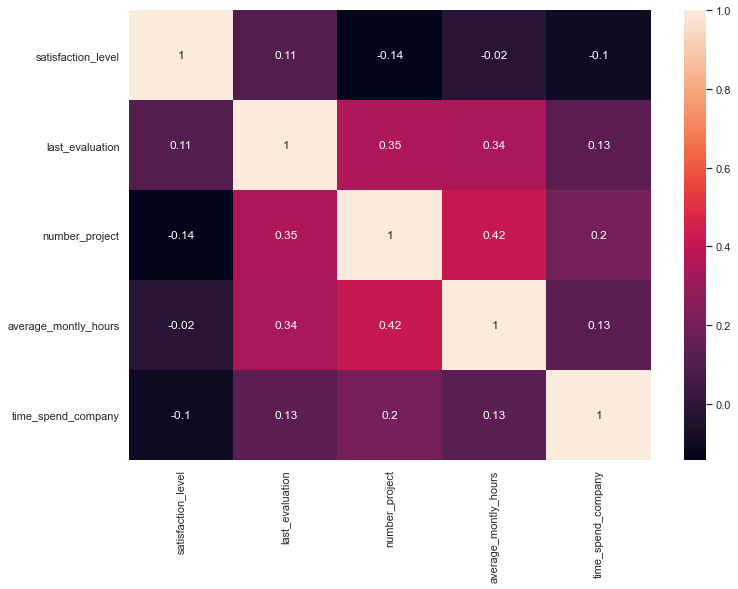

In [52]:
# в случае расчета только оставшихся показателей матрица корреляции имеет следующий вид:
sns.heatmap(df.drop(['department','salary','left','promotion_last_5years','Work_accident'], axis=1).corr(), annot=True)

In [ ]:
# на основании матрицы наиболее сильные связи имеют показатели:
#  1. "average_montly_hours - number_project": 0.42 (прямая связь)
#  2. "last_evaluation - number_project": 0.35 (прямая связь)

# наиболее слабые связи имеют:
#  1. "average_montly_hours - satisfaction_level": -0.02 (обратная связь)
#  2. "last_evaluation - satisfaction_level": 0.11 (прямая связь)

# 4

In [85]:
# №4
# расчет количества сотрудников в каждом департаменте
df.groupby('department').count()['satisfaction_level']

department
IT             1227
RandD           787
accounting      767
hr              739
management      630
marketing       858
product_mng     902
sales          4140
support        2229
technical      2720
Name: satisfaction_level, dtype: int64

In [88]:
# альтернативный вариант расчета количества сотрудников в каждом департаменте
df['department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

# 5

<AxesSubplot:title={'center':'Распределение зарплаты по сотрудникам'}, xlabel='salary'>

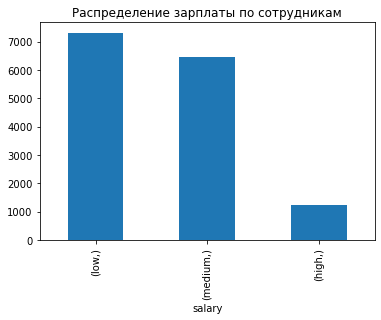

In [55]:
df[['salary']].value_counts().plot(kind="bar",title="Распределение зарплаты по сотрудникам",fontsize = 10)

# 6

<AxesSubplot:title={'center':'Распределение зарплаты по сотрудникам'}, xlabel='salary,department'>

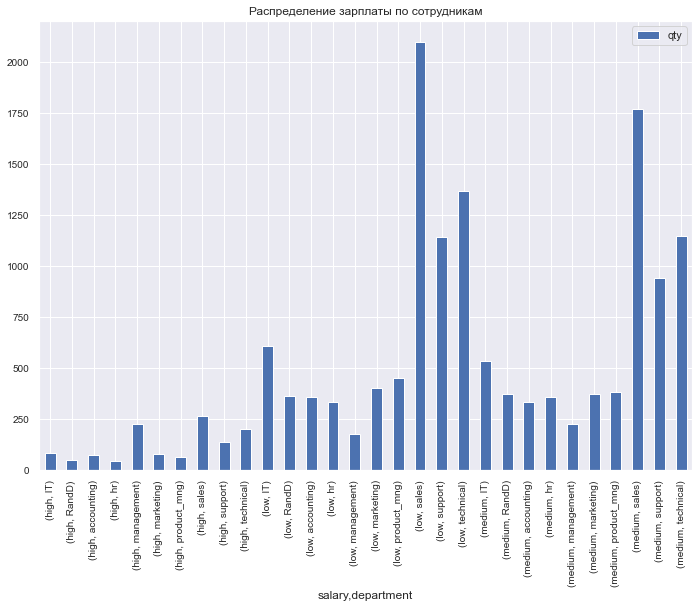

In [96]:
# Распределение сотрудников по зарплатам по каждому департаменту
df["qty"]=1
df[["qty","salary","department"]].groupby(["salary","department"]).count().plot(kind="bar",title="Распределение зарплаты по сотрудникам",fontsize = 10)

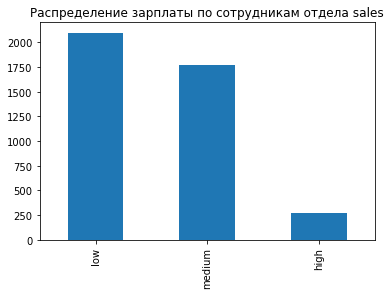

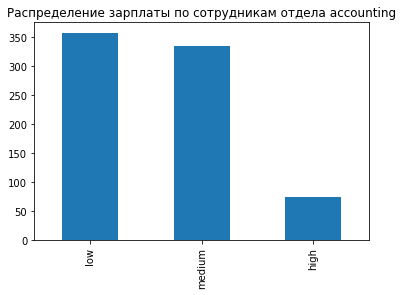

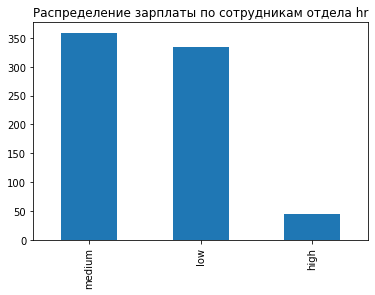

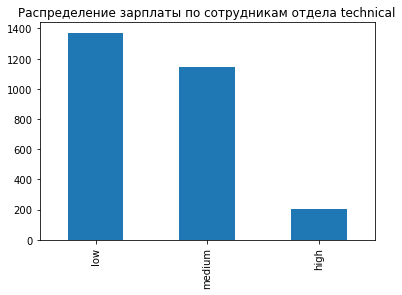

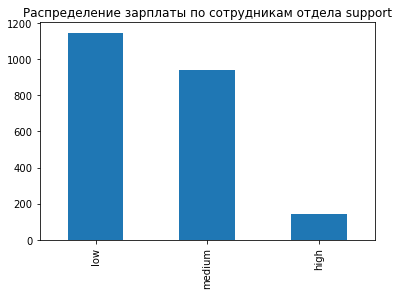

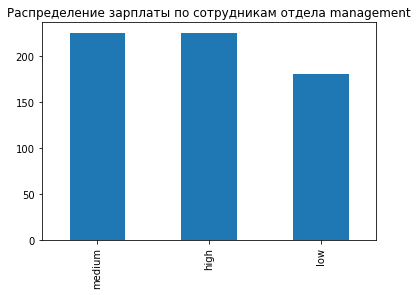

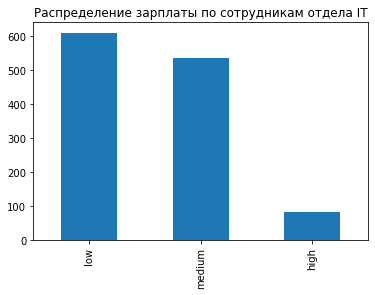

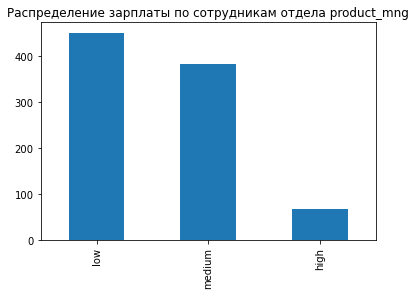

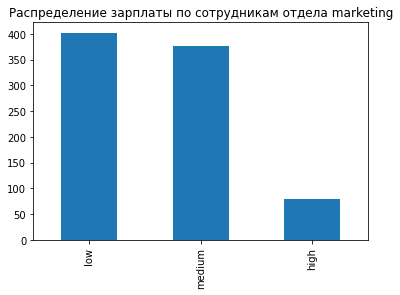

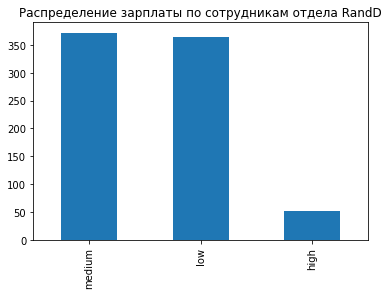

In [157]:
# Вариант визуализации распределения по зарплатам по каждому департаменту на отдельных графиках
def salary_distribution(department):     
    df[df.department == department]['salary'].value_counts().plot(kind="bar",title=f"Распределение зарплаты по сотрудникам отдела {department}",fontsize = 10)
    plt.show()
    return 

for row in df['department'].unique():
     salary_distribution(row)


# 7

In [63]:
# проверка гипотезы что сотрудники с высоким окладом проводят на работе больше времени
# рассчитываем среднее значение времени на работе по сотрудникам в высоким и низким окладами
print(f'Среднее время работы сотрудников с окладом high: {df["average_montly_hours"][df.salary == "high"].mean()}')
print(f'Среднее время работы сотрудников с окладом low: {df["average_montly_hours"][df.salary == "low"].mean()}')
print(f'Среднее время работы сотрудников с окладом low: {df["average_montly_hours"][df.salary == "medium"].mean()}')


Среднее время работы сотрудников с окладом high: 199.86742118027485
Среднее время работы сотрудников с окладом low: 200.9965828321487
Среднее время работы сотрудников с окладом low: 201.33834936394663


In [ ]:
# гипотеза подтвердилась: сотрудники с высоким окладом(high) работают в среднем больше сотрудников с низким окладом (low)
# однако сотрудники со средним окладом(medium) работают больше сотрудников с высоким окладом("high")
# соответсвенно при переформулировке гипотезы работают ли сотрудники с более высоким окладом больше сотрудников с более низким окладом - гипотеза не подтверждается

# 8

In [95]:
# Доля сотрудников с повышениями за последние 5 лет среди уволившихся
print("Доля сотрудников получивших повышение среди уволившихся в %:")
print(df["qty"][(df.left == 1) & (df.promotion_last_5years == 1)].value_counts()/df["qty"][df.left == 1].value_counts() * 100) 

print("Доля сотрудников получивших повышение среди неуволившихся в %:")
# Доля сотрудников с повышениями за последние 5 лет среди неуволившихся
print(df["qty"][(df.left == 0) & (df.promotion_last_5years == 1)].value_counts()/df["qty"][df.left == 0].value_counts() * 100) 


Доля сотрудников получивших повышение среди уволившихся в %:
1    0.532064
Name: qty, dtype: float64
Доля сотрудников получивших повышение среди неуволившихся в %:
1    2.625131
Name: qty, dtype: float64


In [105]:
# средняя степень удовлетворенности среди уволившихся и неуволившихся
print(f'Средняя степень удовлетворенности среди уволившихся: {df["satisfaction_level"][df.left == 1].mean()}')
print(f'Средняя степень удовлетворенности среди неуволившихся: {df["satisfaction_level"][df.left == 0].mean()}')

Средняя степень удовлетворенности среди уволившихся: 0.44009801176140917
Средняя степень удовлетворенности среди неуволившихся: 0.666809590479516


In [107]:
# средняя количество проектов среди уволившихся и неуволившихся
print(f'Средняя количество проектов среди уволившихся: {df["number_project"][df.left == 1].mean()}')
print(f'Средняя количество проектов среди неуволившихся: {df["number_project"][df.left == 0].mean()}')

Средняя количество проектов среди уволившихся: 3.8555026603192384
Средняя количество проектов среди неуволившихся: 3.786664333216661


# 9

In [120]:
from matplotlib import colors
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split

In [137]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['left','department','salary']), df['left'].to_numpy(), random_state=42)
lda = LinearDiscriminantAnalysis()
# обучаем данные и делаем прогноз на тестовой выборке
lda.fit(X_train, y_train)
lda.predict(X_test)

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [142]:
# оцениваем точность прогноза, подключив соответствующий модуль
from sklearn.metrics import accuracy_score
accuracy_score(y_test,lda.predict(X_test))

0.7536